In [1]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from keras.datasets import cifar10

In [2]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [3]:
num_labels = len(np.unique(y_train))
num_labels
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
image_size = x_train.shape[1]
input_size = image_size * image_size * 3

In [6]:
x_train = np.reshape(x_train, [-1, input_size]) #Flatten Manually
x_train = x_train.astype('float32')/255 #Normalize
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32')/255

In [7]:
batch_size = 128 #Arbitrary 2^n
hidden_units = 256 
dropout = 0.45

In [8]:
#with tf.device('/device:GPU:0'):

model = Sequential()
model.add(Dense(hidden_units, input_dim = input_size))
model.add(Activation('relu'))

model.add(Dense(hidden_units))
model.add(Activation('relu'))

model.add(Dense(num_labels))

model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               786688    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 855,050
Trainable params: 855,050
Non-trai

In [9]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [10]:
history = model.fit(x_train, y_train, epochs = 40, batch_size = batch_size)

2023-07-19 15:58:34.153567: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2023-07-19 15:58:35.099062: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/40
391/391 [==============================] - 3s 4ms/step - loss: 1.8767 - accuracy: 0.3259
Epoch 2/40
391/391 [==============================] - 2s 4ms/step - loss: 1.6814 - accuracy: 0.4018
Epoch 3/40
391/391 [==============================] - 2s 5ms/step - loss: 1.5968 - accuracy: 0.4299
Epoch 4/40
391/391 [==============================] - 2s 4ms/step - loss: 1.5486 - accuracy: 0.4466
Epoch 5/40
391/391 [==============================] - 2s 4ms/step - loss: 1.5025 - accuracy: 0.4651
Epoch 6/40
391/391 [==============================] - 2s 4ms/step - loss: 1.4694 - accuracy: 0.4758
Epoch 7/40
391/391 [==============================] - 2s 4ms/step - loss: 1.4436 - accuracy: 0.4855
Epoch 8/40
391/391 [==============================] - 2s 4ms/step - loss: 1.4123 - accuracy: 0.4985
Epoch 9/40
391/391 [==============================] - 2s 4ms/step - loss: 1.3974 - accuracy: 0.5041
Epoch 10/40
391/391 [==============================] - 2s 5ms/step - loss: 1.3607 - accuracy: 0.5179

Matplotlib is building the font cache; this may take a moment.


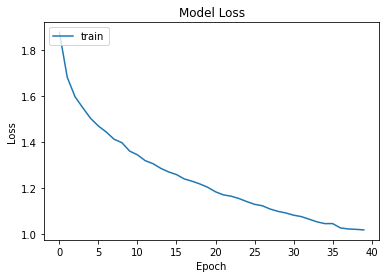

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()